# Аналіз замовлень з сайтів

Опис колонок:

id	- id замовлення	

Date	- дата замовлення		
Country_Code	- країна

Platform	- платформа	

Site_Name	- назва сайту

Items_qty	- кількість одиниць в чеку	

Order_amount	- сума замовлення (включно з доставкою)	

Goods_cost	- вартість товарів у чеку		

## Завантаження та підготовка даних

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel(r'C:\\Users\\Asus\\Desktop\\data_test.xlsx')

In [3]:
df.head()

,id,Date,Country_Code,Platform,Site_Name,Items_qty,Order_amount,Goods_cost
0,314512987,2017-11-30,GB,desktop,name_1,7,4.95,4.21
1,314522703,2017-11-30,SN,desktop,name_5,1,0.03,0.03
2,314634496,2017-11-30,NG,desktop,name_5,1,0.71,0.71
3,314570527,2017-11-30,IN,desktop,name_5,1,0.63,0.63
4,314601750,2017-11-30,IN,desktop,name_5,1,0.11,0.11


In [4]:
# Створення колонки ціни доставки
df["Shipping_cost"] = df["Order_amount"] - df["Goods_cost"]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21905 entries, 0 to 21904
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21905 non-null  int64         
 1   Date           21905 non-null  datetime64[ns]
 2   Country_Code   21897 non-null  object        
 3   Platform       21905 non-null  object        
 4   Site_Name      21905 non-null  object        
 5   Items_qty      21905 non-null  int64         
 6   Order_amount   21905 non-null  float64       
 7   Goods_cost     21905 non-null  float64       
 8   Shipping_cost  21905 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 1.5+ MB


In [6]:
df.isna().sum()

id               0
Date             0
Country_Code     8
Platform         0
Site_Name        0
Items_qty        0
Order_amount     0
Goods_cost       0
Shipping_cost    0
dtype: int64

In [7]:
# Видалення рядків, що мають пропущені значення (для спрощення, в реальності розглянути детальніше рядки і можливо замінити значення)
df.dropna(axis=0, inplace=True)

In [8]:
# Перетворення на категоріальний тип колонок
for col in ['Platform', 'Country_Code', 'Site_Name']:
    df[col] = pd.Categorical(df[col])

## Побудова графіків

Графік 1.

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df['Date'] = df['Date'].apply(lambda x: x.strftime('%d-%m-%Y'))

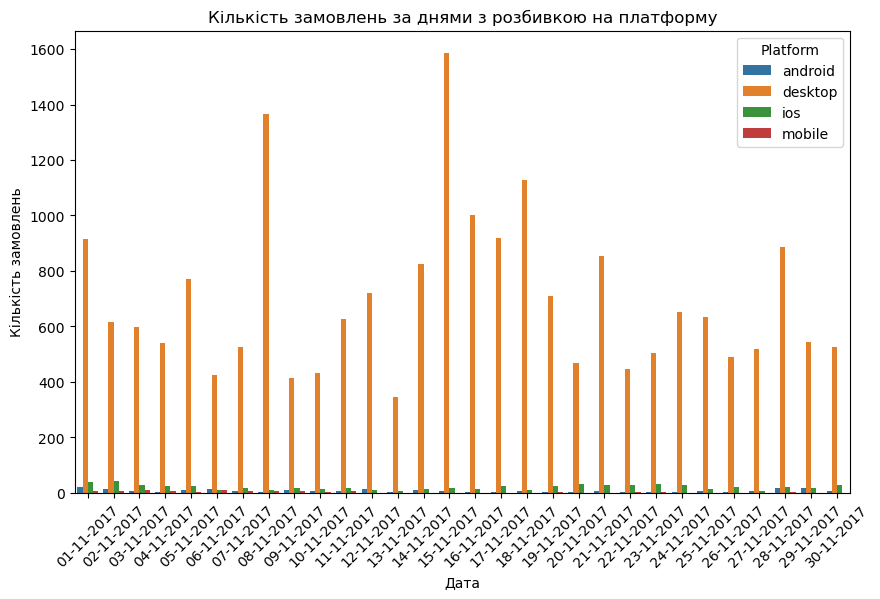

In [11]:
# Агрегуємо дані для barplot
orders_by_date_platform = df.groupby(['Date', 'Platform']).size().reset_index(name='Order_count')

# Побудова barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=orders_by_date_platform, x='Date', y='Order_count', hue='Platform')
plt.xticks(rotation=45)
plt.title('Кількість замовлень за днями з розбивкою на платформу')
plt.xlabel('Дата')
plt.ylabel('Кількість замовлень')
plt.show()

Подивимось окремо без платформи "Desctop", оскільки вона найбільшу кількість замовлень

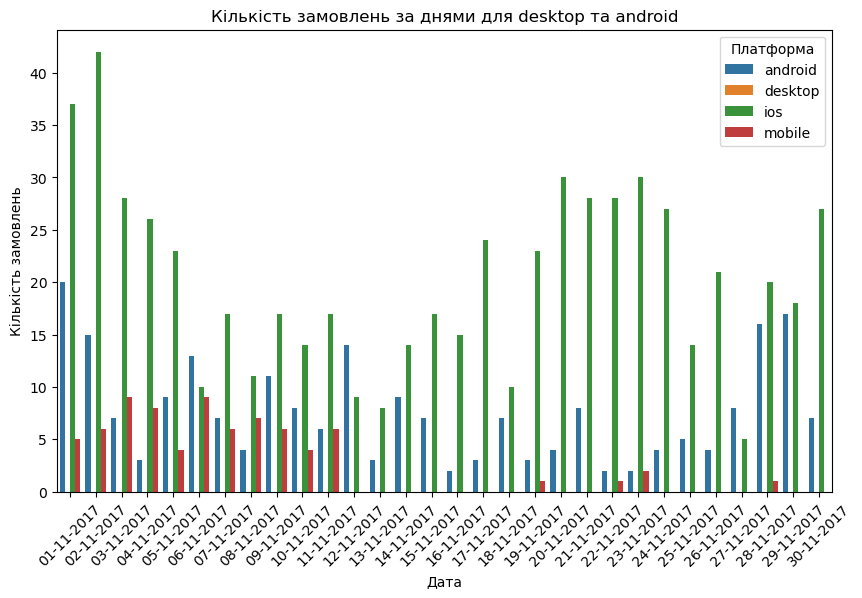

In [12]:
# Фільтруємо дані для desktop та android
filtered_data = df[df['Platform'].isin(['android', 'ios', 'mobile'])]

# Агрегуємо дані для barplot
orders_by_date_platform_filtered = (
    filtered_data.groupby(['Date', 'Platform'])
    .size()
    .reset_index(name='Order_count')
)

# Побудова barplot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=orders_by_date_platform_filtered,
    x='Date',
    y='Order_count',
    hue='Platform'
)
plt.xticks(rotation=45)
plt.title('Кількість замовлень за днями для desktop та android')
plt.xlabel('Дата')
plt.ylabel('Кількість замовлень')
plt.legend(title='Платформа')
plt.show()

Серед мобільних пристроїв ios має найкращі показники. Також бачимо що на початку місяць активні користувачі mobile

Графік 2.

In [13]:
df.id.nunique()

21897

In [14]:
# Агрегуємо дані для lineplot
count_sum_by_date = df.groupby('Date').agg({
    'id': 'count',  
    'Goods_cost': 'sum' 
}).rename(columns={"id": "Count_orders", 'Goods_cost': 'Total_cost'})

count_sum_by_date.head()

,Count_orders,Total_cost
Date,,
01-11-2017,976,3013.03
02-11-2017,678,1826.02
03-11-2017,642,2201.60
04-11-2017,578,1929.30
05-11-2017,807,3060.63


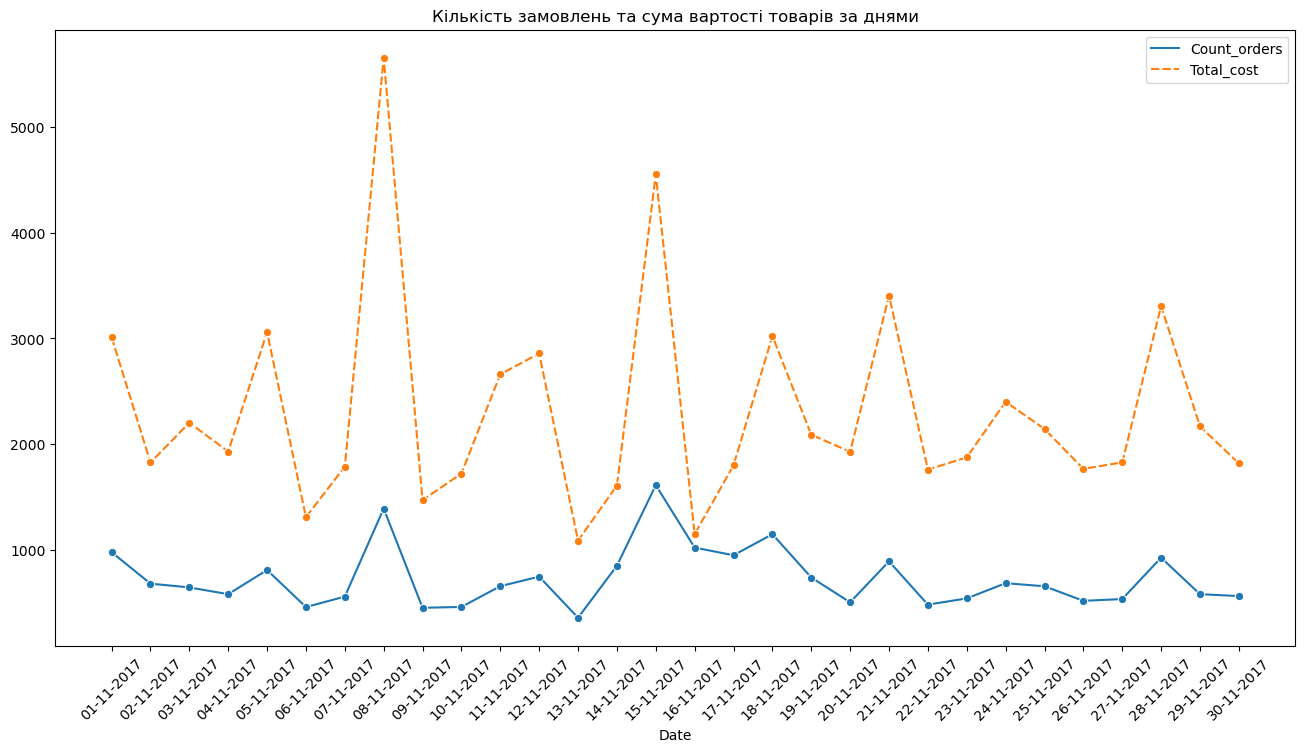

In [30]:
# Побудова графіку
plt.figure(figsize=(16,8))

sns.lineplot(count_sum_by_date, marker='o')
plt.xticks(rotation=45)
plt.title('Кількість замовлень та сума вартості товарів за днями');

Пікові дні: 7-8 та 15-16 Листопада. Ймовірно через свята по типу Чорної п'ятниці

## Формування головних категорій та другорядних

In [16]:
display(df.Platform.unique(),
df.Country_Code.unique(),
df.Site_Name.unique())

['desktop', 'android', 'ios', 'mobile']
Categories (4, object): ['android', 'desktop', 'ios', 'mobile']

['GB', 'SN', 'NG', 'IN', 'UA', ..., 'NL', 'TD', 'CI', 'PM', 'ML']
Length: 161
Categories (161, object): ['AD', 'AE', 'AF', 'AG', ..., 'YE', 'ZA', 'ZM', 'ZW']

['name_1', 'name_5', 'name_2', 'name_6', 'name_4', 'name_3', 'name_7', 'name_8']
Categories (8, object): ['name_1', 'name_2', 'name_3', 'name_4', 'name_5', 'name_6', 'name_7', 'name_8']

In [17]:
df['Platform'] = df['Platform'].replace(['ios', 'mobile'], 'etc')

In [18]:
df['Country_Code'] = df['Country_Code'].apply(lambda x: x if x in ['GB', 'SN', 'UA'] else 'etc')

In [19]:
df['Site_Name'] = df['Site_Name'].apply(lambda x: x if x in ['name_1', 'name_2'] else 'etc')

In [20]:
df['Date'].nunique()

30

In [21]:
import datetime

In [22]:
# Перетворюємо дати в dates_to_keep до формату datetime
dates_to_keep = pd.to_datetime(['2017-11-30', '2017-11-29'])

df['Date'] = df['Date'].apply(lambda x: x if x in dates_to_keep else 'ect')

C:\Users\Asus\AppData\Local\Temp\ipykernel_42648\2912609221.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = df['Date'].apply(lambda x: x if x in dates_to_keep else 'ect')


In [23]:
# Перевірка
df['Date'].unique()

array(['30-11-2017', '29-11-2017', 'ect'], dtype=object)

## Створення зведеної таблиці

In [24]:
pivot_table = df.pivot_table(
    values=['Items_qty', 'Goods_cost', 'Shipping_cost'],
    index=['Platform', 'Site_Name', 'Date'],
    columns='Country_Code',
    aggfunc={'Items_qty': 'count', 'Goods_cost': 'sum', 'Shipping_cost': 'sum'},
    margins=True,
    margins_name="Grand Total"
).rename(columns={'Items_qty':'Amount_order'})


pivot_table = pivot_table.swaplevel(0, 1, axis=1).sort_index(axis=1)
pivot_table = pivot_table.drop(columns='Grand Total', level=0)

# Проміжний результат
pivot_table

Country_Code                               GB                           \
                                 Amount_order Goods_cost Shipping_cost   
Platform    Site_Name Date                                               
android     etc       29-11-2017            0       0.00          0.00   
                      30-11-2017            0       0.00          0.00   
                      ect                   1       1.40          0.60   
            name_1    29-11-2017            0       0.00          0.00   
                      30-11-2017            0       0.00          0.00   
                      ect                   0       0.00          0.00   
            name_2    29-11-2017            0       0.00          0.00   
                      30-11-2017            0       0.00          0.00   
                      ect                   0       0.00          0.00   
desktop     etc       29-11-2017            1       0.27          0.00   
                      30-11-2017            1       0.27          0.00   
                      ect                  46      59.06         21.60   
            name_1    29-11-2017            0       0.00          0.00   
                      30-11-2017            5      37.01          6.52   
                      ect                 113     695.89        122.53   
            name_2    29-11-2017            0       0.00          0.00   
                      30-11-2017            0       0.00          0.00   
                      ect                   9      56.56          7.59   
etc         etc       29-11-2017            1       8.40          3.60   
                      30-11-2017            0       0.00          0.00   
                      ect                  17     166.55         71.40   
            name_1    29-11-2017            0       0.00          0.00   
                      30-11-2017            0       0.00          0.00   
                      ect                   1       9.53          1.68   
            name_2    29-11-2017            0       0.00          0.00   
                      30-11-2017            0       0.00          0.00   
                      ect                   0       0.00          0.00   
Grand Total                               195    1034.94        235.52   

Country_Code                               SN                           \
                                 Amount_order Goods_cost Shipping_cost   
Platform    Site_Name Date                                               
android     etc       29-11-2017            0       0.00          0.00   
                      30-11-2017            0       0.00          0.00   
                      ect                   0       0.00          0.00   
            name_1    29-11-2017            0       0.00          0.00   
                      30-11-2017            0       0.00          0.00   
                      ect                   0       0.00          0.00   
            name_2    29-11-2017            0       0.00          0.00   
                      30-11-2017            0       0.00          0.00   
                      ect                   0       0.00          0.00   
desktop     etc       29-11-2017            0       0.00          0.00   
                      30-11-2017            1       0.03          0.00   
                      ect                   0       0.00          0.00   
            name_1    29-11-2017            0       0.00          0.00   
                      30-11-2017            0       0.00          0.00   
                      ect                   2       3.74          0.66   
            name_2    29-11-2017            0       0.00          0.00   
                      30-11-2017            0       0.00          0.00   
                      ect                   1       9.53          1.68   
etc         etc       29-11-2017            0       0.00          0.00   
                      30-11-2017            0       0.00          0.00   
   

In [25]:
# Відокремлюємо Grand Total, щоб розмістити його в кінці
grand_total = pivot_table.loc[('Grand Total', '', '')]
pivot_table = pivot_table.drop(index='Grand Total', level=0)

In [26]:
# Додавання Subtotal за датами для кожної комбінації 'Platform' і 'Site_Name'
subtotal_df = pivot_table.groupby(level=['Platform', 'Site_Name']).sum()

# Додаємо новий рівень індексу 'Subtotal' замість дати
subtotal_df.index = subtotal_df.index.set_names(['Platform', 'Site_Name'])
subtotal_df['Date'] = 'Subtotal'
subtotal_df = subtotal_df.set_index('Date', append=True)

# Об'єднання оригінальної таблиці з Subtotal
pivot_table = pd.concat([pivot_table, subtotal_df]).sort_index()

pivot_table = pd.concat([pivot_table, grand_total.to_frame().T])

In [27]:
# Фінальна таблиця
pivot_table

Country_Code                               GB                           \
                                 Amount_order Goods_cost Shipping_cost   
Platform    Site_Name Date                                               
android     etc       29-11-2017          0.0       0.00          0.00   
                      30-11-2017          0.0       0.00          0.00   
                      Subtotal            1.0       1.40          0.60   
                      ect                 1.0       1.40          0.60   
            name_1    29-11-2017          0.0       0.00          0.00   
                      30-11-2017          0.0       0.00          0.00   
                      Subtotal            0.0       0.00          0.00   
                      ect                 0.0       0.00          0.00   
            name_2    29-11-2017          0.0       0.00          0.00   
                      30-11-2017          0.0       0.00          0.00   
                      Subtotal            0.0       0.00          0.00   
                      ect                 0.0       0.00          0.00   
desktop     etc       29-11-2017          1.0       0.27          0.00   
                      30-11-2017          1.0       0.27          0.00   
                      Subtotal           48.0      59.60         21.60   
                      ect                46.0      59.06         21.60   
            name_1    29-11-2017          0.0       0.00          0.00   
                      30-11-2017          5.0      37.01          6.52   
                      Subtotal          118.0     732.90        129.05   
                      ect               113.0     695.89        122.53   
            name_2    29-11-2017          0.0       0.00          0.00   
                      30-11-2017          0.0       0.00          0.00   
                      Subtotal            9.0      56.56          7.59   
                      ect                 9.0      56.56          7.59   
etc         etc       29-11-2017          1.0       8.40          3.60   
                      30-11-2017          0.0       0.00          0.00   
                      Subtotal           18.0     174.95         75.00   
                      ect                17.0     166.55         71.40   
            name_1    29-11-2017          0.0       0.00          0.00   
                      30-11-2017          0.0       0.00          0.00   
                      Subtotal            1.0       9.53          1.68   
                      ect                 1.0       9.53          1.68   
            name_2    29-11-2017          0.0       0.00          0.00   
                      30-11-2017          0.0       0.00          0.00   
                      Subtotal            0.0       0.00          0.00   
                      ect                 0.0       0.00          0.00   
Grand Total                             195.0    1034.94        235.52   

Country_Code                               SN                           \
                                 Amount_order Goods_cost Shipping_cost   
Platform    Site_Name Date                                               
android     etc       29-11-2017          0.0       0.00          0.00   
                      30-11-2017          0.0       0.00          0.00   
                      Subtotal            0.0       0.00          0.00   
                      ect                 0.0       0.00          0.00   
            name_1    29-11-2017          0.0       0.00          0.00   
                      30-11-2017          0.0       0.00          0.00   
                      Subtotal            0.0       0.00          0.00   
                      ect                 0.0       0.00          0.00   
            name_2    29-11-2017          0.0       0.00          0.00   
                      30-11-2017          0.0       0.00          0.00   
                      Subtotal            0.0       0.00          0.00   
   

In [29]:
# Збереження таблиці в Excel 
pivot_table.to_excel('result_table.xlsx')

# таблиця окремим файлом прикріплена

# Tableau

Переглянути дашборд по аналізу замовлень: https://public.tableau.com/app/profile/anastasiia.koval8703/viz/SalesDashbord_17318634519150/Dashboard1?publish=yes

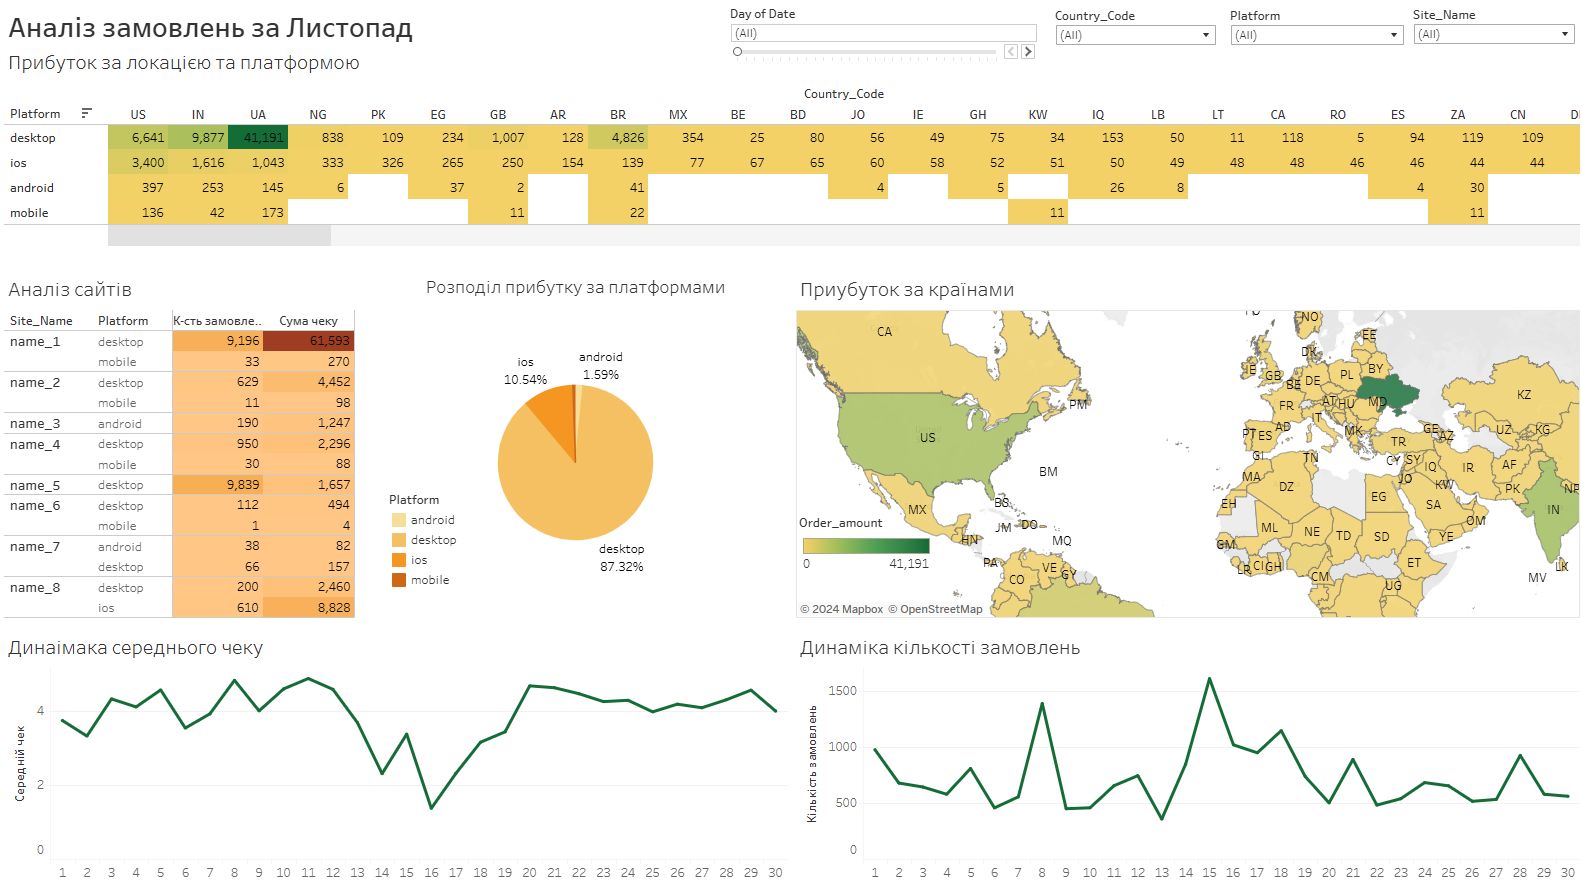

Висновки:
- Найбільше прибутку приходить з платформи Desctop (87%) ; IoS на другому місці (10%); 
- Найбільша кількість замовлень також з платформи Desctop; IoS на другому місці; 
-  Найбільший прибуток приходить з України (41,191), США (6,641) та Індії (4,967); 
- Сайт name_1 приносить найбільший прибуток та є найбільш відвідуваним клієнтами;


- За Листопад місяць бачимо таку тенденцію: коли середній чек падає (14-16.11), то зростає кількість замовлень, проте загальна сума замовлень в ці дні має високий показник також. Можливо це пов'язано з акціяними дня ("Чорна п'ятниця") і тоді люди роблять багато дешевих покупок. 

- Можна переглянути конверсію: відношення відвідувачів сайту до кількості оформлених замовлень.
- Коефіцієнт відмови: відсоток користувачів, які покинули сайт без оформлення замовлення.
- Середній час, який клієнти проводять на сайті перед оформленням покупки.
- Можна відслідковува з якого трафіку прийшов клієнтів, щоб зрозуміти доцільність реклами.
- Можна переглянути також середню кількість позицій в чекові. Й стимулювати її до підвищення різними акціями. Які позиції купують найчастіше.
- Частка повторних покупців у загальній кількості замовлень.

Рекомендації щодо підвищення продажів: 
- Розвивати канал платформи ios, щоб бути на рівні з Desctop;
- Оскільки прибуток із мобільних платформ значно нижчий, варто оптимізувати мобільні версії сайтів, покращити їхню швидкість завантаження та дизайн.
- Залучити більше реклами на сайт name_5, name_8, name_2. Вони мають гарні показнки по кількості замовлень та сумі чека.
- Збільшити маркетингові зусилля в країнах з високим прибутком (UA, US, IN). В Україні, зокрема, варто акцентувати на спеціальних пропозиціях.
- Спробувати запускати локальну рекламу почергово на кожну країну, щоб більше залучати клієнтів звідси.
- Організація розпродажів у пікові періоди (15-20 листопада), враховуючи існуючі піки активності потрібно втримувати велику кількість замовлень і надалі, точковими акціями, наприклад, чи впровадження рекомендацій на основі попередніх покупок клієнта.